In [46]:
# Install & imports
!pip install ultralytics opencv-python matplotlib kagglehub --quiet

import torch, os, glob
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import kagglehub

print("CUDA available:", torch.cuda.is_available())


# Upload trained model weights

print("📁 Please select your best.pt file (e.g., 'best (2) (2).pt').")
uploaded = files.upload()

# Use the exact filename you see in 'uploaded'
model_path = list(uploaded.keys())[0]
print("Using model file:", model_path)



CUDA available: True
📁 Please select your best.pt file (e.g., 'best (2) (2).pt').


Saving best (2).pt to best (2) (4).pt
Using model file: best (2) (4).pt


✅ Model loaded successfully!

▶ Demo on sample URL images

🔹 Running demo on: https://ultralytics.com/images/zidane.jpg

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 1 Happy, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


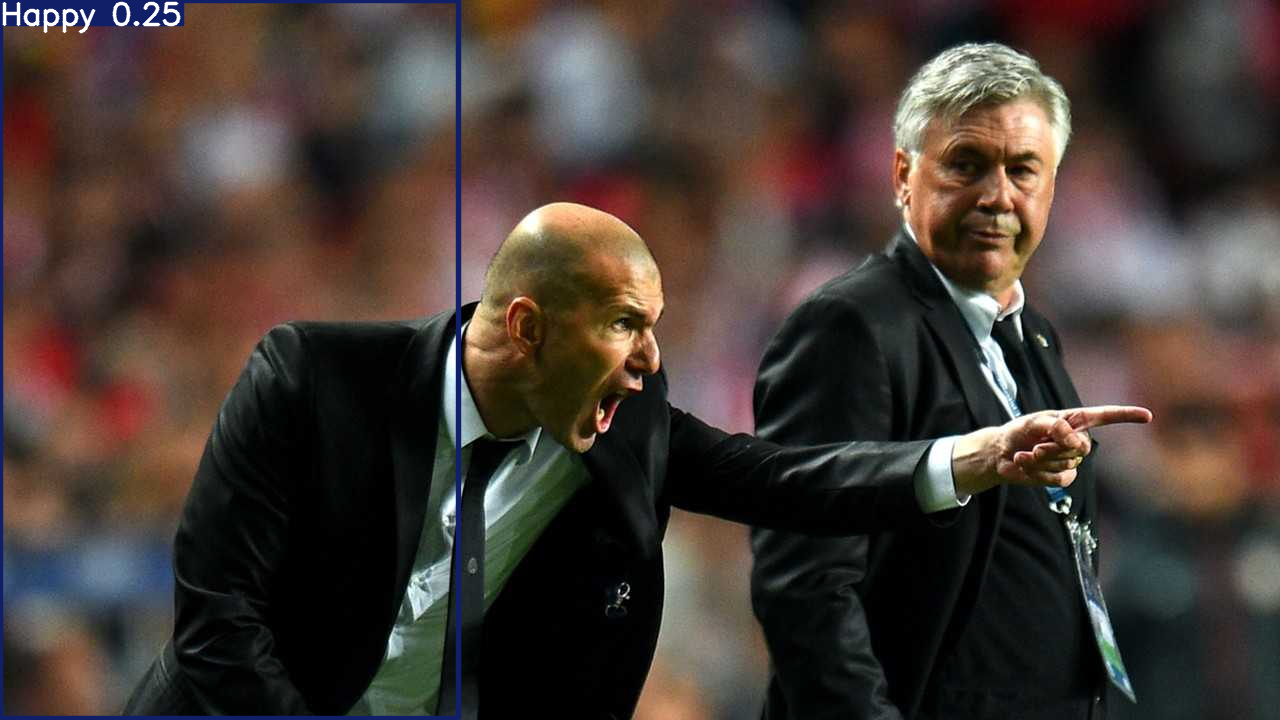

Detections for: https://ultralytics.com/images/zidane.jpg
  Detected: Happy (0.25)

🔹 Running demo on: https://ultralytics.com/images/bus.jpg

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 (no detections), 14.1ms
Speed: 3.6ms preprocess, 14.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


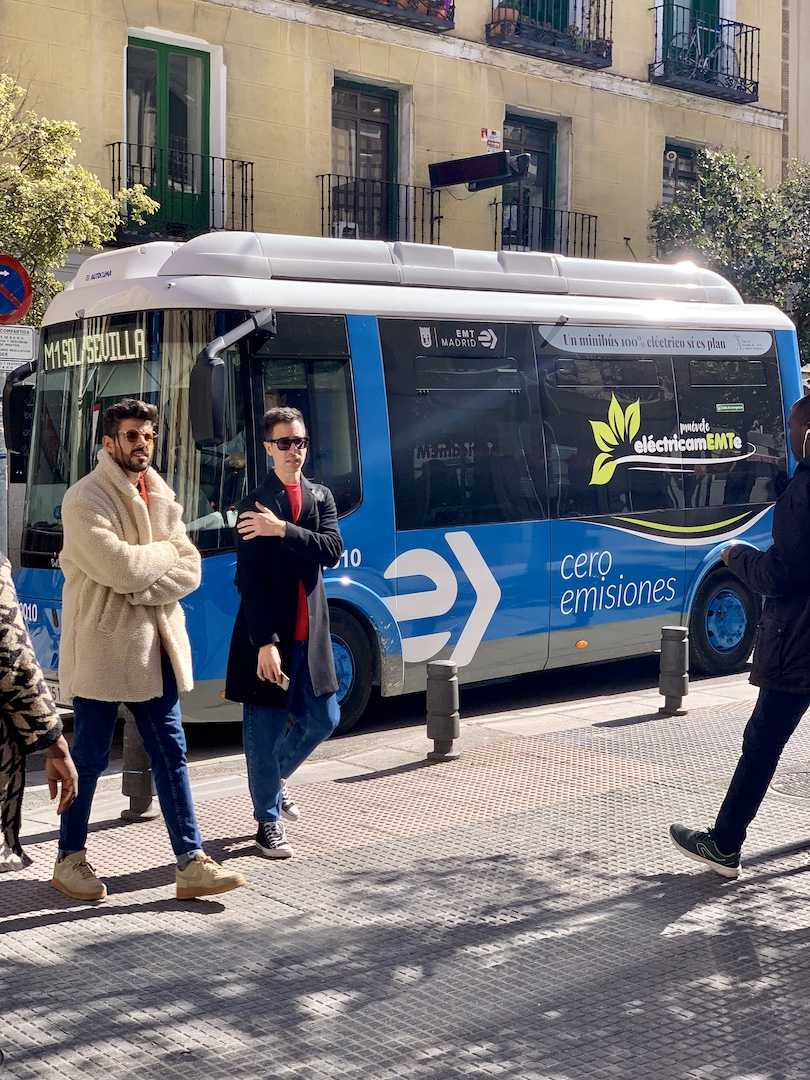

Detections for: https://ultralytics.com/images/bus.jpg
  No detections.

⬇ Downloading/locating Kaggle AffectNet YOLO-format dataset...
Using Colab cache for faster access to the 'affectnet-yolo-format' dataset.
Dataset path: /kaggle/input/affectnet-yolo-format
Top-level contents: ['YOLO_format']
YOLO_format contents: ['data.yaml', 'valid', 'test', 'train']
Total test images found: 1752
Using these test images for demo:
 - image0041513.jpg
 - image0032809.jpg
 - image0024358.jpg
 - image0028772.jpg
 - image0019127.jpg

🟩 Running demo on dataset image: image0041513.jpg

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0041513.jpg: 640x640 1 Contempt, 16.6ms
Speed: 3.0ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


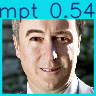

Detections for: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0041513.jpg
  Detected: Contempt (0.54)

🟩 Running demo on dataset image: image0032809.jpg

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0032809.jpg: 640x640 1 Surprise, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


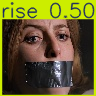

Detections for: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0032809.jpg
  Detected: Surprise (0.50)

🟩 Running demo on dataset image: image0024358.jpg

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0024358.jpg: 640x640 1 Surprise, 15.6ms
Speed: 2.6ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


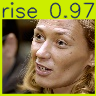

Detections for: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0024358.jpg
  Detected: Surprise (0.97)

🟩 Running demo on dataset image: image0028772.jpg

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0028772.jpg: 640x640 1 Neutral, 15.7ms
Speed: 2.6ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


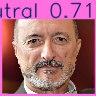

Detections for: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0028772.jpg
  Detected: Neutral (0.71)

🟩 Running demo on dataset image: image0019127.jpg

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0019127.jpg: 640x640 1 Surprise, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


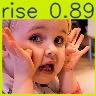

Detections for: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0019127.jpg
  Detected: Surprise (0.89)

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 1 Happy, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 (no detections), 13.3ms
Speed: 3.5ms preprocess, 13.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0041513.jpg: 640x640 1 Contempt, 16.4ms
Speed: 2.8ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/affectnet-yolo-format/YOLO_format/test/images/image0032809.jpg: 640x640 1 Surprise, 15.8ms
Speed: 4.0ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1

In [50]:
# Load model
model = YOLO(model_path)
print("✅ Model loaded successfully!")


# Demo function

def run_demo(image_path):
    """Run detection on an image and display results."""
    results = model(image_path)

    # Show image with detections
    results[0].show()

    # Print detections
    print("Detections for:", image_path)
    if results[0].boxes is None or len(results[0].boxes) == 0:
        print("  No detections.")
        return

    for box in results[0].boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = model.names[class_id]
        print(f"  Detected: {class_name} ({confidence:.2f})")


# Test on sample images (URLs)

demo_images = [
    "https://ultralytics.com/images/zidane.jpg",
    "https://ultralytics.com/images/bus.jpg"
]

print("\n▶ Demo on sample URL images")
for img in demo_images:
    print(f"\n🔹 Running demo on: {img}")
    run_demo(img)


# Test on real dataset images (Kaggle AffectNet)

print("\n⬇ Downloading/locating Kaggle AffectNet YOLO-format dataset...")
path = kagglehub.dataset_download("fatihkgg/affectnet-yolo-format")
print("Dataset path:", path)
print("Top-level contents:", os.listdir(path))

yolo_root = os.path.join(path, "YOLO_format")
print("YOLO_format contents:", os.listdir(yolo_root))

test_dir = os.path.join(yolo_root, "test", "images")
test_images = glob.glob(os.path.join(test_dir, "*.jpg"))
print("Total test images found:", len(test_images))

# Take first 5 test images for Test Dataset

test_samples = test_images[:5]
print("Using these test images for demo:")
for t in test_samples:
    print(" -", os.path.basename(t))

for img_path in test_samples:
    print(f"\n🟩 Running demo on dataset image: {os.path.basename(img_path)}")
    run_demo(img_path)


# Statistics

def count_all_detections(image_list):
    total = 0
    for img in image_list:
        results = model.predict(source=img, imgsz=640, conf=0.25)
        total += len(results[0].boxes)
    return total

total_images = len(demo_images) + len(test_samples)
total_detections = count_all_detections(demo_images + test_samples)

print("\n Demo Statistics")
print(f"Processed {total_images} images")
print(f"Total detections: {total_detections}")
